# Exploring the Jumia Smart TV Catalogue Dataset 

## by (Olatunji Jola)

## Introduction
> The Jumia smart TV dataset contains 1615 smart TV listing Scraped from the Jumia website. The data set contains 1615 Observations and 7 variables. The data was scraped using scrapy as a json file name `'jumia_tv_catalogue.json'` and given descrpitive column names. In this notebook, I will be cleaning up the dataset and then analysing the dataset for patterns in the aim of performing a market research on the best smart tv in different categories, by size, features, ratings, and pricing and to check for the seller on the jumia website with the best offerings in terms of quality, ratings and pricing. 

In [1]:
# import all packages and set plots to be embedded inline 
import pandas as pd
from pandas import json_normalize
import numpy as np
import json
import matplotlib .pyplot as plt
import seaborn as sb
import re

%matplotlib inline


In [2]:
# import the json
with open ('jumia_tv_catalogues.json', 'r') as file:
    smart_tv_catalogue = json.load(file)

In [3]:
# loading the json file into a dataframe
pd_tv_catalogue = json_normalize(smart_tv_catalogue)

### Preliminary Wrangling 

in this Section various observation are made about the dataset for cleaning purposes

In [4]:
pd_tv_catalogue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1652 non-null   object
 1   brand          1646 non-null   object
 2   price          1646 non-null   object
 3   ratings        1652 non-null   object
 4   specification  1652 non-null   object
 5   Seller_name    1652 non-null   object
 6   seller_rating  1426 non-null   object
 7   url            1652 non-null   object
dtypes: object(8)
memory usage: 103.4+ KB


In [5]:
pd_tv_catalogue.sample(20)

,name,brand,price,ratings,specification,Seller_name,seller_rating,url
1029,Samsung 75 Inch Ultra Slim UHD Smart Flat LED ...,Samsung,"₦ 1,300,000",0 out of 5,"[Display 75 inches Screen, 3840 X 2160 4K UHD ...",Bryan's store,100%,https://www.jumia.com.ng/samsung-75-inch-ultra...
254,LG 86 Inch UHD 4K TV Large Screen Design 4K Ac...,LG,"₦ 1,240,000",0 out of 5,[],Energy mall,60%,https://www.jumia.com.ng/lg-86-inch-uhd-4k-tv-...
1169,LG 70″ UHD 4K SMART Satellite TV With AI ThinQ,LG,"₦ 759,999",0 out of 5,"[Size 70 Inches, Picture Quality 4K U...",ELECTROPLUG,66%,https://www.jumia.com.ng/lg-70-uhd-4k-smart-sa...
1101,Samsung 65 Inch Premium QLED Q60T UHD Class Sm...,Samsung,"₦ 999,900",0 out of 5,"[4K UHD 3840 x 2160 QLED Panel, HDR10, HDR10+,...",Samsung and Sony online store,66%,https://www.jumia.com.ng/samsung-65-inch-premi...
1484,Famicare 3.5kva 24v Pure Sinewave Inverter,Famicare,"₦ 219,000",0 out of 5,"[Famicare product, 3.5kva 24V inverter, Pure s...",360degree,100%,https://www.jumia.com.ng/famicare-3.5kva-24v-p...
190,Samsung 65 Inch Ultra Slim Premium UHD Class H...,Samsung,"₦ 680,000",0 out of 5,[],JennyLink Store,30%,https://www.jumia.com.ng/samsung-65-inch-ultra...
1450,"Hisense 55''Smart UHD 4K TV+Netflix,Youtube&DSTV",Hisense,"₦ 268,400",0 out of 5,[],ELECTROPLUG,66%,https://www.jumia.com.ng/hisense-55smart-uhd-4...
1025,Polystar 40 INCH SMART CURVED LED TV + Free Wa...,Polystar,"₦ 142,900",0 out of 5,"[Features: Wi-Fi, Colour: Black, Product warr...",JennyLink Store,30%,https://www.jumia.com.ng/polystar-40-inch-smar...
1218,Samsung 75” Crystal UHD 4K Smart TV 75aU8000U ...,Samsung,"₦ 979,000",0 out of 5,"[75” UHD TV, Series 7, Resolution 3840*2160 (4...",Kendo,80%,https://www.jumia.com.ng/samsung-75-crystal-uh...
349,Hisense 50''Smart UHD 4K TV+DSTV Now APP-50A71...,Hisense,"₦ 222,999",4.6 out of 5,[],Homewarehouse,60%,https://www.jumia.com.ng/hisense-50smart-uhd-4...


#### How many unique brands are in the dataset

In [6]:
# Checking for unique brands

pd_tv_catalogue['brand'].unique()

array(['WEYON', 'Amani', 'TCL', 'Hisense', 'Rock', 'Polystar', 'Infinity',
       'Energy', 'Vision', 'Transparent', 'BUC', 'LG', 'UFC', 'Syinix',
       'Samsonic', 'Amaz', 'Samsung', 'MK', 'Sony', 'Konka', 'Maxi',
       'Felicity Solar', 'itel', 'Sanyo', 'Infinix', 'Electronic Arts',
       'Sonix', 'High', 'XIAOMI', 'Bruhm', 'Luminous', 'Royal',
       'Panasonic', 'Rilsopower', 'Skyworth', 'Homeflower', 'XTRAPOWER',
       'Aida', None, 'Mercedes Amg', 'Google', 'Famicare', 'Dexter'],
      dtype=object)

##### Observation
45 unique brands can be observed overall. However, the Felicity Solar brand name is not a TV brand.

#### Check for Duplicates

In [7]:
# columns to check for duplicated values
column_names =  ['name', 'brand', 'price', 'ratings', 'Seller_name', 'seller_rating']

# checking for duplicates
duplicates = pd_tv_catalogue.duplicated(subset = column_names, keep = False)

pd_tv_catalogue[duplicates].sort_values(by = 'name')

,name,brand,price,ratings,specification,Seller_name,seller_rating,url
1454,Amaz Real 32''inch Dual Glass TV +18 Months Wa...,Amaz,"₦ 70,080",0 out of 5,[],AMAZ official shop,60%,https://www.jumia.com.ng/amaz-real-32inch-dual...
750,Amaz Real 32''inch Dual Glass TV +18 Months Wa...,Amaz,"₦ 70,080",0 out of 5,[],AMAZ official shop,60%,https://www.jumia.com.ng/amaz-real-32inch-dual...
1230,"Hisense 50'' Smart UHD 4K TV+ Bluetooth, Netfl...",Hisense,"₦ 222,999",0 out of 5,"[50'' 4K UHD TV, BLUETOOTH, NETFLIX, YOUTUBE, ...",Homewarehouse,60%,https://www.jumia.com.ng/hisense-50-smart-uhd-...
723,"Hisense 50'' Smart UHD 4K TV+ Bluetooth, Netfl...",Hisense,"₦ 222,999",0 out of 5,"[50'' 4K UHD TV, BLUETOOTH, NETFLIX, YOUTUBE, ...",Homewarehouse,60%,https://www.jumia.com.ng/hisense-50-smart-uhd-...
881,"Hisense 50''QLED Smart 4K TV+Netflix,Youtube A...",Hisense,"₦ 320,000",0 out of 5,[],Real EmmyGod Store,50%,https://www.jumia.com.ng/hisense-50qled-smart-...
...,...,...,...,...,...,...,...,...
412,Syinix 50'' INCHES SMART ANDROID UHD 4K TV + F...,Syinix,"₦ 265,000",0 out of 5,"[50'' Smart 4K UHD TV, Resolution: (3839 x 216...",Luchi's Store,94%,https://www.jumia.com.ng/syinix-50-inches-smar...
1368,TCL 43 Inches Full HD Smart Certified Android ...,TCL,"₦ 230,000",0 out of 5,"[Supported Apps: Netflix, You Tube, Hotstar, Z...",Worldmartin,100%,https://www.jumia.com.ng/tcl-43-inches-full-hd...
1382,TCL 43 Inches Full HD Smart Certified Android ...,TCL,"₦ 230,000",0 out of 5,"[Supported Apps: Netflix, You Tube, Hotstar, Z...",Worldmartin,100%,https://www.jumia.com.ng/tcl-43-inches-full-hd...
945,TCL 55 Inch Ultra Slim Smart UHD Android 4K TV,TCL,"₦ 400,000",0 out of 5,"[55 inch LED UHD Android TV, OS Android P UI S...",Bryan's store,100%,https://www.jumia.com.ng/tcl-55-inch-ultra-sli...


In [8]:
#number of duplicated items
pd_tv_catalogue.duplicated(subset = column_names, keep = 'first').sum()

40

##### Observation

There are 30 duplicated items in the dataset

### Cleaning

In this section the observed issues with the dataset will be addressed.

The following cleaning operations will be carried out.

- drop duplicated rows
- Remove entries that are not TVs
- Make the `name` column more brief
- change the `Seller` column to be all small letters
- make the price column a number and describe the currency in the price column title
- for prices defined by price ranges find the average price.
- make the seller_rating column categorical variable
- rating should be categorical variable
- address missing values
- expand the specification column focusing on key metrics eg. ports, screen_resolution, screen_types, and screen_size   



#### Make a copy

In [9]:
pd_tv_catalogue_default = pd_tv_catalogue.copy()

#### Drop duplicates

In [10]:
#drop duplicate rows
pd_tv_catalogue.drop_duplicates(subset = column_names, inplace= True)

#### Test

In [11]:
pd_tv_catalogue.duplicated(subset = column_names).sum()

0

#### Drop Entries that are not TVs

most entries that are TVs contain any of the following words in their names.

- TV, Tv, inches, #", UHD, 4K, Full HD, Television  or smart 

In [12]:
# Drop rows that do not meet the condition in the pattern 
pattern = 'TV|inch|\"|uhd|4k|full hd|television|smart'
contains_no_TV = pd_tv_catalogue.name.str.contains(pattern, flags=re.IGNORECASE, regex =True)
pd_tv_catalogue.drop(pd_tv_catalogue[~contains_no_TV].index, inplace = True)
pd_tv_catalogue.reset_index(drop = True, inplace = True)

#### Test

#### Make the name column more brief

To make the name column more brief, the folowing steps will be taken.

1. Split the name column using the keyword 'TV' as the delimiter.
2. Merge with expanded output with the subset of the `pd_tv_catalogue` using the index, and effectively remplacing the previous name column.
3. append 'TV' to the names in the new name column.

In [13]:
# split the name column
pd_tv_catalogue_name_split = pd_tv_catalogue.name.str.split(r'(?i)TV', regex = True, expand = True)[0]

# merge the two dfs to create a new dataframe with the new name column
pd_tv_catalogue_coumn_list = ['brand','price', 'ratings', 
                              'specification', 'Seller_name', 'seller_rating', 'url']
pd_tv_renamed = pd.merge(pd_tv_catalogue_name_split,pd_tv_catalogue[pd_tv_catalogue_coumn_list], 
         left_index = True, right_index = True)

# change the name and seller_name column header
pd_tv_renamed.columns = ['name','brand','price', 'ratings', 
                        'specification', 'seller_name', 'seller_rating', 'url']
#append the names with the word tv; convert all to lowercase.
pd_tv_renamed.name = pd_tv_renamed.name.apply(lambda x: '{}tv'.format(x.lower()))

#### Test

In [14]:
test_name_df = pd.merge(pd_tv_catalogue.name, pd_tv_renamed.name, left_index = True, right_index = True)
test_name_df.head(10)

,name_x,name_y
0,"WEYON 32"" Inches HD Smart TV (32WASN) +1 Year...","weyon 32"" inches hd smart tv"
1,Amani 43”Inch 4k UHD Smart Android Wi-fi Tv A...,amani 43”inch 4k uhd smart android wi-fi tv
2,TCL 43-Inch Android Smart FHD TV,tcl 43-inch android smart fhd tv
3,"Hisense 55''Smart UHD 4K TV+Bluetooth,Netflix,...",hisense 55''smart uhd 4k tv
4,"Hisense 55''Smart UHD 4K Framless TV+Netflix,...",hisense 55''smart uhd 4k framless tv
5,"Rock 43"" 4k SMART ANDROID UHD LED TV + FREE WA...","rock 43"" 4k smart android uhd led tv"
6,Polystar 40 INCH SMART CURVED LED TV + Free Wa...,polystar 40 inch smart curved led tv
7,Hisense 43''Smart TV + Netflix&Youtube APP 12 ...,hisense 43''smart tv
8,"WEYON 39"" Inches LED Smart TV (39WASN) +1 Year...","weyon 39"" inches led smart tv"
9,Hisense 40 Inches Smart Frameless TV + 12 Mont...,hisense 40 inches smart frameless tv


#### Make the price column numeric
To achieve this; 

1. All special characters i.e '₦',',' and space will first be removed, 
2. drop nulls, 
3. deal with price ranges by finding there averages.
4. then convert to integer.

In [15]:
# Remove all special character from price
pd_tv_renamed.price = pd_tv_renamed.price.str.replace(',', '').str.replace('₦','').str.strip()

In [16]:
pd_tv_renamed.price

0                  79990
1                 128490
2                 169900
3                 265000
4                 222000
              ...       
1563              109900
1564              167900
1565              185300
1566              161460
1567    117499 -  117999
Name: price, Length: 1568, dtype: object

In [17]:
# remove nulls in the price column

filter = pd_tv_renamed.price.isnull()
pd_tv_renamed.drop(pd_tv_renamed[filter].index, axis = 0, inplace = True)
pd_tv_renamed.reset_index(drop =True, inplace  = True)

In [18]:
# find the average of price ranges.
price_ranges = pd_tv_renamed.price.str.split(' - ', expand = True)
price_ranges[0] = price_ranges[0].astype('int')
price_ranges[1] = price_ranges[1].astype('float')

In [19]:
price_ranges['average'] = price_ranges.agg('mean', axis = 1)

In [20]:
column = ['name', 'brand', 'price', 'ratings',
          'specification', 'seller_name', 
          'seller_rating', 'url']
pd_tv_price_cleaned = price_ranges.merge(pd_tv_renamed[column], left_index = True, right_index = True)

In [21]:
pd_tv_price_cleaned.drop([0,1, 'price'], axis = 1, inplace = True)
pd_tv_price_cleaned.columns =['price','name', 'brand', 'ratings',
                              'specification', 'seller_name', 
                              'seller_rating', 'url']

In [22]:
pd_tv_price_cleaned['price'] = pd_tv_price_cleaned.price.astype('int')

#### Test

In [23]:
pd_tv_price_cleaned.price.dtype

dtype('int32')

#### Make the ratings column numerical variable

- Extract the rating as number from the ratings clumn
- convert to float
- drop the ratings column

In [24]:
# Extract the ratings from the the 
# ratings columns name into a new column rating
pd_tv_price_cleaned['rating'] = pd_tv_price_cleaned.ratings.str.extract(r"(\d?\.?\d)")

In [25]:
# convert he rating column to float type.
pd_tv_price_cleaned['rating'] = pd_tv_price_cleaned.rating.astype('float')

In [26]:
pd_tv_price_cleaned.drop('ratings', axis = 1, inplace = True)

#### Test

In [27]:
pd_tv_price_cleaned[pd_tv_price_cleaned.rating.isnull()]

,price,name,brand,specification,seller_name,seller_rating,url,rating


#### Convert seller ratings to numerical variables
- extract the numerical content of the seller_rating column
- 205 observaions has no seller_rating this is due tobeing new sellers
- those null values will be replaced with 0
- The column will be converted to integers

#### Code

In [28]:
#extract numerical content of seller_rating column
pd_tv_price_cleaned.seller_rating = pd_tv_price_cleaned.seller_rating.str.extract(r"(\d+)")

# Repalce Nans with 0
pd_tv_price_cleaned.seller_rating.fillna(0, inplace = True)

# convert type to integer
pd_tv_price_cleaned.seller_rating = pd_tv_price_cleaned.seller_rating.astype(int)

#### Test

In [29]:

assert pd_tv_price_cleaned.seller_rating.dtype == 'int'

In [30]:
pd_tv_price_cleaned

,price,name,brand,specification,seller_name,seller_rating,url,rating
0,79990,"weyon 32"" inches hd smart tv",WEYON,"[Model：32WASN, Panel size: 32, Excellent Pictu...",WEYON Official Store-Sea-COD,60,https://www.jumia.com.ng/weyon-32-inches-hd-sm...,4.7
1,128490,amani 43”inch 4k uhd smart android wi-fi tv,Amani,[],cydone gas,74,https://www.jumia.com.ng/amani-43inch-4k-uhd-s...,5.0
2,169900,tcl 43-inch android smart fhd tv,TCL,"[12 Months Warranty, Certified Android Smart T...",Clem Fortune,100,https://www.jumia.com.ng/tcl-43-inch-android-s...,4.3
3,265000,hisense 55''smart uhd 4k tv,Hisense,"[55'' 4K UHD TV, BLUETOOTH, NETFLIX, YOUTUBE, ...",F & G Electronics,86,https://www.jumia.com.ng/hisense-55smart-uhd-4...,4.9
4,222000,hisense 55''smart uhd 4k framless tv,Hisense,[],Kendo,80,https://www.jumia.com.ng/hisense-55smart-uhd-4...,0.0
...,...,...,...,...,...,...,...,...
1557,109900,hisense 32” led smart hd tv,Hisense,"[Series A4G, Diagonal Class - 32 Inches, Color...",Franco global electronics Ltd.,100,https://www.jumia.com.ng/32high-definition-led...,4.9
1558,167900,hisense 43” smart frameless tv,Hisense,"[Screen Size: 43″ Smart tv, Screen Type: LED B...",Franco global electronics Ltd.,100,https://www.jumia.com.ng/hisense-43-smart-fram...,4.8
1559,185300,"ufc ''55"" inch 4k ultra-hd smart led android tv",UFC,"[Transparent Smart TV ., RAM 4G 4K HDR, 55 INC...",EbocasBabyClothings,80,https://www.jumia.com.ng/ufc-55-inch-4k-ultra-...,4.4
1560,161460,"hisense 43"" inches led smart tv",Hisense,[​],Jumia,100,https://www.jumia.com.ng/hisense-43-inches-led...,5.0


#### Specification

In treating the specification column I will be extracting from the specification column, information futher divided into four caegories.

- Screen size e.g, 32, 40, 43 
- Screen Resolution e.g., Full HD,4k, 8k
- Screen types e.g. LED, LCD,OLED,QLED,nanocell
- Ports

hd,fhd,uhd,

##### Screen Size
 To deal with the screen size;
 
 1. using regex extract the size from the name column
 2. any one without the size information in the name column then extract from the url column

In [31]:
# extract the screen_size information from the name
pd_tv_price_cleaned['screen_size']=pd_tv_price_cleaned.name.str.extract(r'\w+\s(\d{2})')

# copy all null screen size value into a separate df
df_null_size = pd_tv_price_cleaned[pd_tv_price_cleaned['screen_size'].isnull()].copy()

# drop nulls from the initial df
pd_tv_price_cleaned.dropna(subset = ['screen_size'], axis= 0, inplace = True)

# extract the scren_size from url 
df_null_size['screen_size'] = df_null_size.url.str.extract(r'.+\/(?:\w+-)?(?:\w+-){1,10}(\d{2}|\w{1,2}\d{2})-?(?:inch|inche|inches|class|uhd|crystal|smart)')

# drop nulls drom the df_null_size DataFrame
df_null_size.dropna(subset = ['screen_size'], axis = 0, inplace = True)

# concatenate the two dataframe
pd_tv_screen_size_cleaned = pd.concat([pd_tv_price_cleaned,df_null_size] )

In [32]:
pd_tv_screen_size_cleaned['screen_size'] = pd_tv_screen_size_cleaned.screen_size.str.extract(r'(\d{2})').astype(int)

In [33]:
pd_tv_screen_size_cleaned.url.loc[6:10].to_list()

['https://www.jumia.com.ng/polystar-40-inch-smart-curved-led-tv-free-wall-bracket-77448540.html',
 'https://www.jumia.com.ng/hisense-43smart-tv-netflixyoutube-app-12-months-warranty-68877472.html',
 'https://www.jumia.com.ng/weyon-39-inches-led-smart-tv-39wasn-1-year-warranty-black-147693535.html',
 'https://www.jumia.com.ng/hisense-40-inches-smart-frameless-tv-12-months-warranty-77043242.html',
 'https://www.jumia.com.ng/hisense-50smart-uhd-4k-tvbluetoothnetflixyoutubedstv-now-app-72247116.html']

#### Test
- check all the unique value in the column
- clean up errors

In [34]:
# All unique values in the column
pd_tv_screen_size_cleaned.screen_size.unique()

array([32, 43, 55, 40, 39, 50, 58, 65, 75, 19, 42, 70, 85, 86, 82, 49, 48,
       20, 10])

#### observation
Some values  e.g 10,19,20 looks unrealistic and should be probed further

In [35]:
# Change the screen size value from 20 to 85 and from 10 to 39
pd_tv_screen_size_cleaned.loc[pd_tv_screen_size_cleaned['screen_size']==20, 'screen_size'] = 85
pd_tv_screen_size_cleaned.loc[pd_tv_screen_size_cleaned['screen_size']==10, 'screen_size'] = 39

#### Test

In [36]:
assert len(pd_tv_screen_size_cleaned[pd_tv_screen_size_cleaned['screen_size'].isin([20,10])])==0

#### Screen_size as categorical variable
Although the screen size are numerical variable, they are actually categorical variable


In [37]:
def ordered_class(list_,dataframe,col, order):
    
    
    '''
    creates an ordered class of a categorical variable
    
    Args:
    list_ (list): Ordered list of the class
    dataframe (DataFrame): The DataFrame on which the categorical variable exist
    col (string): the c column of interest
    order (boolean) a True or False value indicating whether the category should be ordered or not.
    
    
    returns:
    dataframe[col]:The column that is now converted to categorical variable 
    
    '''
    # creating an ordered category of c class
    class_ = pd.api.types.CategoricalDtype(ordered = order, categories = list_)
    
    #apply to c_col
    dataframe[col] = dataframe[col].astype(class_)
    return (dataframe[col])

In [38]:
pd_tv_screen_size_cleaned.loc[:,'screen_size']=pd_tv_screen_size_cleaned.screen_size.astype('str')

In [39]:
cat = np.sort(pd_tv_screen_size_cleaned.screen_size.unique())
cat_str =[str(v) for v in cat]
ordered_class(cat_str,pd_tv_screen_size_cleaned,'screen_size',True)

0       32
1       43
2       43
3       55
4       55
        ..
1461    55
1464    65
1469    43
1492    55
1559    55
Name: screen_size, Length: 1559, dtype: category
Categories (17, object): ['19' < '32' < '39' < '40' ... '75' < '82' < '85' < '86']

#### Test

In [40]:
pd_tv_screen_size_cleaned.screen_size.dtype

CategoricalDtype(categories=['19', '32', '39', '40', '42', '43', '48', '49', '50', '55',
                  '58', '65', '70', '75', '82', '85', '86'],
, ordered=True)

##### Screen Resolution

The screen resolution is the number of pixels per length in a rectangular dimension that the screen can depict. This defines the picture quality that is obtainable from the TV.
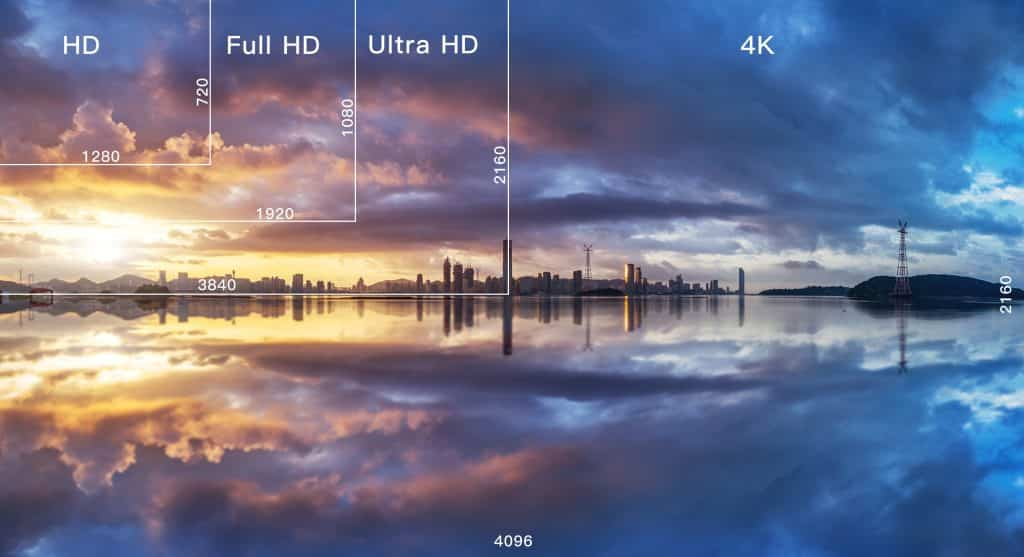

These are generally classified into this three categories
1. High Definition   ( 1280 x 720) HD
2. Full High Definition  (1920 x 1080) FHD
3. Ultra High Definition  (3840 x 2160) UHD
4. 4k (4096 x 2160) 

Note: Most times manufacturers use UHD and 4k interchangeably, therefore i will be using Uhd as an umbrella category for both uhd and 4k.


The screen resolution information will be extracted from two columns:
1. The url column 
2. The specification column.


1. The url column: To extract from the url column, I will be performing two task in two stages
>  **stage 1**
>- Split the url column by using `\`to get to the chunck of text containing the desired resolution information.
>- Extract the chunck of text containing the resolution information into an intermediate column using the item_selector function

>>**stage 2**
>>- Split the chunk of text by `-` to get to the desired information.
>>- Extract the chunck of text containing the resolution information using the item_selector function. 

2. The specifiction column: To extract from the specification column, I will perform two stages of data extraction.
> **Stage 1**
>- Extract the chunck of text containing the resolution information using the the item_selector function into an intermediate column

> **Stage 2**

> Extract the resolution information from the extracted column using the item_selector function.


In [41]:

def item_selector(df_row):
    for i in range(len(df_row)):
        items =  df_row[i]
        if 'full' in items :
            return items
        elif 'ultra' in items :
            return items
        elif items == 'hd':
            return items
        elif items == 'uhd':
            return items
        elif items == 'fhd':
            return items
        elif 'high' in items:
            return items
        elif '4k' in items:
            return items
        elif '8k' in items:
            return items
        else:
            pass
    

In [42]:
def item_selector2(df_row):
    try:
        
        for i in range(len(df_row)):
            items =  df_row[i]
            if 'full' in items :
                return items
            elif 'ultra' in items :
                return items
            elif 'hd' in items:
                return items

            elif 'high' in items:
                return items
            elif '4k' in items:
                return items
            elif '8k' in items:
                return items
            else:
                pass
    except Exception as e:
        return(e)

In [43]:
def item_selector3(df_row):
    
    '''
    select 
    '''
    for i in range(len(df_row)):
        items =  df_row[i]
        items = items.lower()
        if 'full' in items :
            return items
        elif 'ultra' in items :
            return items
        elif 'hd' in items:
            return items
        elif 'resolution' in items:
            return items
        elif 'picture' in items:
            return items
        elif 'quality' in items:
            return items
        elif '4k' in items:
            return items
        elif 'high' in items:
            return items
        elif '8k' in items:
            return 
        else:
            pass

In [44]:
def item_selector4(items):
    
    
        '''
        Select the resolution information from the specificaton column 
        using different regex pattern in a set of conditional statement. 
    
        '''
        items = items.lower()
        
        pattern_1 = re.search(r'(?:\w+)?\s?(?:resolution|features|)\D?(?:.+)?(full\s?-?hd)(?:.+)?', items)
        pattern_2 = re.search(r'\d\D?\d{3}\s?x?\*?\s?\d\D?\d+', items)
        pattern_3 = re.search(r'4k uhd', items)
        pattern_4 = re.search(r'4k', items)
        pattern_5 = re.search(r'uhd', items) 
        pattern_6 = re.search(r'fhd', items)
        pattern_7 = re.search(r'full high definition', items)
        pattern_8 = re.search(r'hd(?!mi)', items)
        
        if pattern_1 is not None:
            try:
                return(pattern_1.group(1))
            except Exception as e:
                return(e)
        elif pattern_2 is not None:
            try:
                value = int(pattern_2[0].replace(',', '')[0:4])
                if value == 1366 or value ==1336:
                    return('hd')
                elif value == 1920:
                    return('fhd')
                elif value == 3840:
                    return('uhd')
                else:
                    pass
                    
            except Exception as e:
                return(e)
        elif pattern_3 is not None:
            try:
                return(pattern_3[0])
            except Exception as e:
                return(e)
        elif pattern_4 is not None:
            try:
                return(pattern_4[0])
            except Exception as e:
                return(e)
        elif pattern_5 is not None:
            try:
                return(pattern_5[0])
            except Exception as e:
                return(e)
        elif pattern_6 is not None:
            try:
                return(pattern_6[0])
            except Exception as e:
                return(e)
        elif pattern_7 is not None:
            try:
                return('fhd')
            except Exception as e:
                return(e)
        elif pattern_8 is not None:
            try:
                return(pattern_8[0])
            except Exception as e:
                return(e)
        else:
            pass

##### url column  -stage 1


In [45]:
# Split by '/' and extract resolution information
pd_tv_screen_size_cleaned['split_url'] = pd_tv_screen_size_cleaned['url'].apply(lambda x: item_selector2(x.split('/')))

# Collect all the rows that yields non null values
pd_test2 = pd_tv_screen_size_cleaned[~pd_tv_screen_size_cleaned['split_url'].isnull()].copy()

# Collect all the rows that yields null values
pd_test2_null = pd_tv_screen_size_cleaned[pd_tv_screen_size_cleaned['split_url'].isnull()].copy()



In [46]:
pd_tv_screen_size_cleaned['url'].apply(lambda x: x )

0       https://www.jumia.com.ng/weyon-32-inches-hd-sm...
1       https://www.jumia.com.ng/amani-43inch-4k-uhd-s...
2       https://www.jumia.com.ng/tcl-43-inch-android-s...
3       https://www.jumia.com.ng/hisense-55smart-uhd-4...
4       https://www.jumia.com.ng/hisense-55smart-uhd-4...
                              ...                        
1461    https://www.jumia.com.ng/lg-uhd-4k-tv-55-inch-...
1464    https://www.jumia.com.ng/lg-uhd-tv-65-inch-4k-...
1469    https://www.jumia.com.ng/polystar-polystar-43-...
1492    https://www.jumia.com.ng/ufc-55-inch-4k-ultra-...
1559    https://www.jumia.com.ng/ufc-55-inch-4k-ultra-...
Name: url, Length: 1559, dtype: object

##### url column -stage 2

This operation is carried out on the the non-null table, `pd_test2`

In [47]:
# split the split_url column by '-' and extract the url information
pd_test2['res_url2'] = pd_test2['split_url'].apply(lambda x: item_selector2(x.split('-')))

#####  specification column -stage1
This operation is carried out on the null table `pd_test2_null`

In [48]:
# Extract the chunck of text with the resoluton information 
pd_test2_null['res_null'] = pd_test2_null['specification'].apply(lambda x: (item_selector3(x)))

# Collect all the rows that yields non null values
pd_test2_not_null = pd_test2_null[~pd_test2_null['res_null'].isnull()].copy()

# Collect all the rows that yields null values
pd_test2_spec_null = pd_test2_null[pd_test2_null['res_null'].isnull()].copy()

#####  specification column -stage2
This operation is carried out on the table, `pd_test2_not_null` that yield values that are not null.

In [49]:
# Extract the resolution informaton from the intermediate column
pd_test2_not_null['res_spec'] = pd_test2_not_null['res_null'].apply(lambda x: item_selector4(x))

#collect all rows yielding null values
df_res_spec_null = pd_test2_not_null[pd_test2_not_null['res_spec'].isnull()].copy()

# collect all rows with non_null values 
df_res_spec = pd_test2_not_null[~pd_test2_not_null['res_spec'].isnull()].copy()

##### final cleanup
- concatenate all the tables with not null values
- concatenate all the tables with null value.

- standardise the screen resolution column to contain only three variables. i.e. hd, fhd, uhd and 8k

#### Treating tables with non null resolution values.

two such tables exist
1. pd_test2
2. df_res_spec


- drop `split_url` and `res_null`columns
- rename the `res_url2`and `res_spec` columns to `resolution`

In [50]:
# drop the split_url column in pd_test2
pd_test2.drop('split_url', axis = 1, inplace =True)

# drop `split_url` and `res_null` columns in df_res_spec
df_res_spec.drop(['split_url', 'res_null'],  axis = 1, inplace =True)

In [51]:
# rename res_url2 as resolution 
pd_test2.columns = ['price', 'name', 'brand', 'specification', 'seller_name',
       'seller_rating', 'url', 'rating', 'screen_size', 'resolution']

# rename res_spec as resolution
df_res_spec.columns = ['price', 'name', 'brand', 'specification', 'seller_name',
       'seller_rating', 'url', 'rating', 'screen_size', 'resolution']

# concatenate pd_test2 and df_res_spec
df_resolution_cleaned = pd.concat([pd_test2, df_res_spec], ignore_index = True)

#### Test
ensure that all observation with resolution information has been captured

In [52]:
assert df_resolution_cleaned.resolution[df_resolution_cleaned.resolution.isnull()].sum() == 0

##### Treating tables with non null resolution values

two such tables exist
1. pd_test2_spec_null
2. df_res_spec_null

1. drop the `split_url` and the `res_null` column
2. rename `res_null` and the `res_spec`


In [53]:
# drop the split_url column in pd_test2_spec_null
pd_test2_spec_null.drop('split_url', axis = 1, inplace =True)

# drop `split_url` and `res_null` columns in df_res_spec_null
df_res_spec_null.drop(['split_url', 'res_null'],  axis = 1, inplace =True)

In [54]:
# rename res_null as resolution 
pd_test2_spec_null.columns = ['price', 'name', 'brand', 'specification', 'seller_name',
       'seller_rating', 'url', 'rating', 'screen_size', 'resolution']

# rename res_spec as resolution
df_res_spec_null.columns = ['price', 'name', 'brand', 'specification', 'seller_name',
       'seller_rating', 'url', 'rating', 'screen_size', 'resolution']

# concatenate pd_test2_spec_null and df_res_spec_null
df_resolution_cleaned_null = pd.concat([pd_test2_spec_null, df_res_spec_null], ignore_index = True)

#### combine the null and  not_null Dataframe
1. create a final table of the entire dataset with the resolution column.
2. standardize the resolution column to contain either `hd`, `fhd`, `uhd` or `None`

In [55]:
# concatenate df_resolution_cleaned_null and df_resolution_cleaned
resolution_cleaned = pd.concat([df_resolution_cleaned, df_resolution_cleaned_null], ignore_index = True)

In [56]:
resolution_cleaned.resolution.unique()

array(['hd', '4k', 'fhd', 'uhd', 'full', '32high', '434k', 'hdr', '8k',
       'ultra', 'uhd4ktvbluetoothnetflixyoutubedstv', '43full', '70uhd',
       '50uhd', 'jp50a4kyt', '43uhd', '65uhd', 'hdmi3usbsmartbuilt',
       '55uhd', '85smartuhd4ktvbluetoothnetflixyoutubedstv', '4kva',
       '75uhd', '3hdmi', '704k', 'uhd4k', 'high', 'full hd', 'full-hd',
       '4k uhd', None], dtype=object)

#### standardize the resolution column

- The resolution column can have only five variables; hd, fhd, uhd, 8k or None.  

- ['hd', '4k', 'fhd', 'uhd', 'full', '32high', '434k', 'hdr', '8k',
       'ultra', 'uhd4ktvbluetoothnetflixyoutubedstv', '43full', '70uhd',
       '50uhd', 'jp50a4kyt', '43uhd', '65uhd', 'hdmi3usbsmartbuilt',
       '55uhd', '85smartuhd4ktvbluetoothnetflixyoutubedstv', '4kva',
       '75uhd', '3hdmi', '704k', 'uhd4k', 'high', 'full hd', 'full-hd',
       '4k uhd', None]
       
- each item in the resolution column represents one of the 4 acceptable variable

1. hd = ['hd, '32high','high']
2. fhd = ['fhd', 'full', '43full', 'full hd', 'full-hd']
3. uhd = ['4k', 'uhd', '434k', 'ultra', 'uhd4ktvbluetoothnetflixyoutubedstv', 
          '70uhd', '50uhd', 'jp50a4kyt', '43uhd', '65uhd', '55uhd', '85smartuhd4ktvbluetoothnetflixyoutubedstv'
          '4kva', '75uhd', 'uhd4k', '704k', '4k uhd',  ]
4. '8k' = ['8k']
5.  None = ['hdr', 'hdmi3usbsmartbuilt', '3hdmi', None]

In [57]:
def res_column_constrainer(var):
    
    hd = ['hd','32high','high']
    fhd = ['fhd', 'full', '43full', 'full hd', 'full-hd']
    uhd = ['4k', 'uhd', '434k', 'ultra', 'uhd4ktvbluetoothnetflixyoutubedstv', 
          '70uhd', '50uhd', 'jp50a4kyt', '43uhd', '65uhd', '55uhd', '85smartuhd4ktvbluetoothnetflixyoutubedstv'
          '4kva', '75uhd', 'uhd4k', '704k', '4k uhd']
    e8k = ['8k']
          
    if var in hd:
          return('hd')
    elif var in fhd:
          return('fhd')
    elif var in uhd:
          return('uhd')
    elif var in e8k:
          return('8k')
    else:
          pass
          
    

In [58]:
resolution_cleaned['resolution'] = resolution_cleaned['resolution'].apply(lambda x: res_column_constrainer(x))

#### Test

In [59]:
resolution_cleaned['resolution'].unique()

array(['hd', 'uhd', 'fhd', None, '8k'], dtype=object)

#### panel_types:

TV panel technology are mainly classified by the backlighting and can be broadly divided into ;
1. OLED - Organic Light Emiting Diode
2. QLED - Quantum dot Light Emiting Diode
3. DLED - Direct lit LED
4. ULED - Ultra LED
5. ELED - Edge lit LED
6. Nano-cell - 

In the next set of cells I will be collecting the above variables across the rows into a column `panel_type`

In [60]:
def panel_type_selector(x):
    
    a = re.search(r'[dqoue]?led', x)
    b = re.search(r'nano\D?c?e?l?l?', x)
    try:
        if a is not None:
            return(a[0])
        elif b is not None:
            return('nanocell')
    except Exception as e:
        return (e)
    

In [61]:
def selector_looper(y,selector):
    for var in y:
        var = var.lower()
        try:
            return(selector(var))
        except Exception as e:
            return(e)
    

In [62]:
# extract the panel_type informaion from either the specification or the url column  
mask = ['specification', 'url']
resolution_cleaned['panel_type'] = resolution_cleaned[mask].apply(lambda x: panel_type_selector(x.iloc[1])
                                                                    if panel_type_selector(x.iloc[1])!=None
                                                                    else selector_looper(x.iloc[0],panel_type_selector),
                                                                    axis = 1)



In [63]:
resolution_cleaned[~resolution_cleaned['panel_type'].isnull()]

,price,name,brand,specification,seller_name,seller_rating,url,rating,screen_size,resolution,panel_type
5,285599,"rock 43"" 4k smart android uhd led tv",Rock,"[43"" 4K SMART ANDROID UHD LED TV, Browser: Yes...",Nature Colours,100,https://www.jumia.com.ng/rock-43-4k-smart-andr...,4.1,43,uhd,led
7,199999,"infinity 55"" inch 4k ultra-hd smart led androi...",Infinity,"[INFINITY Smart TV ., RAM 1.5G 4K HDR, 55 INCH...",B AND Q COLLECTIBLES,74,https://www.jumia.com.ng/infinity-55-inch-4k-u...,4.5,55,uhd,led
11,109000,hisense 32”high definition led smart tv,Hisense,"[Diagonal Class 32 Inches, Color Black...",Samsung and Sony online store,66,https://www.jumia.com.ng/hisense-32high-defini...,4.0,32,hd,led
13,122000,"rock 43"" 4k uhd smart led tv",Rock,"[43"" 4K SMART ANDROID UHD LED TV, Browser: Yes...",Fresh-Tech,26,https://www.jumia.com.ng/rock-43-4k-uhd-smart-...,4.1,43,uhd,led
15,290000,"polystar 65"" inch 4k uhd android smart tv",Polystar,"[DLED 4K2K Smart TV, Ultra HD, Sound USB 3.0, ...",OSAI-EMP CONSULT,66,https://www.jumia.com.ng/polystar-65-inch-4k-u...,4.0,65,uhd,dled
...,...,...,...,...,...,...,...,...,...,...,...
1551,170999,"lg 43"" led tv",LG,"[43'' LED TV, Made In Korea, Antenna Input , 1...",Homewarehouse,60,https://www.jumia.com.ng/lg-43-led-tv-2-years-...,0.0,43,None,led
1552,116900,polystar 32-inches smart curved tv,Polystar,"[32 INCH LED TV, CURVED, SMART, Netflix, USB, ...",Office Comfort Enterprises,60,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led
1554,118000,polystar 32-inches smart curved tv,Polystar,"[32 INCH LED TV, CURVED, SMART, Netflix, USB, ...",Kendo,80,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led
1556,116695,polystar 32-inches smart curved tv,Polystar,"[32 INCH LED TV, CURVED, SMART, Netflix, USB, ...",Office Comfort Enterprises,60,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led


#### Android_TV

    All smart tv have the ability to provide internet based contents through incorporating the content vendor application
    Android_TV are subset of the the smart_tv category that allow them to have access to wider range of google store applications and updates. 
  
  In the next set of cells i will be extracting this specification information
  in the dataset, there are two(2) indicators of whether a tv is an android tv
  either stated as 
  1. androd _tv or 
  2. google tv
  
  Note: I am assuming that if the operating system is not specifically stated as android then it is not an android.

In [64]:
resolution_cleaned['name'].to_list()

['weyon 32" inches hd smart  tv',
 'amani 43”inch 4k uhd  smart android wi-fi tv',
 'tcl 43-inch android smart fhd tv',
 "hisense 55''smart uhd 4k tv",
 "hisense 55''smart uhd 4k  framless tv",
 'rock 43" 4k smart android uhd led tv',
 "hisense 50''smart uhd 4k tv",
 'infinity 55" inch 4k ultra-hd smart led android tv',
 'infinity 55" inch smart uhd 4k tv',
 'infinity 50" inch smart full hd 4k screen tv',
 'hisense 58 inch 4k ultra hd smart tv',
 'hisense 32”high definition led smart tv',
 'hisense 55 inches smart 4k uhd tv',
 'rock 43" 4k uhd smart led tv',
 'vision 43” inches 4k uhd android smart tv',
 'polystar 65" inch 4k uhd android smart tv',
 'polystar 65" inch andriod smart 4k full hd tv',
 'hisense 55 inches smart 4k uhd frameless tv',
 "hisense 50'' smart 4k uhd frameless smart tv",
 "hisense 58'' smart uhd 4k tv",
 'infinity 32" inches smart full hd led tv',
 'weyon 55" inches fhd smart tv',
 'weyon 43" inches fhd smart tv',
 'hisense 50 inch 4k ultra hd smart tv',
 'polysta

In [65]:
def android_selector(x):
    
    value = re.search(r'android|andriod|google', x)
    try:
        
        if value is not None:
            return('yes')
        else:
            return('no')
    except Exception as e:
        return(e)

In [66]:
# extract the panel_type informaion from either the specification or the url column  
mask = ['specification', 'url']
resolution_cleaned['android'] = resolution_cleaned[mask].apply(lambda x: android_selector(x.iloc[1])
                                                                    if android_selector(x.iloc[1])!=None
                                                                    else selector_looper(x.iloc[0], android_selector),
                                                                    axis = 1)

In [67]:
resolution_cleaned[resolution_cleaned['android'].notnull()]

,price,name,brand,specification,seller_name,seller_rating,url,rating,screen_size,resolution,panel_type,android
0,79990,"weyon 32"" inches hd smart tv",WEYON,"[Model：32WASN, Panel size: 32, Excellent Pictu...",WEYON Official Store-Sea-COD,60,https://www.jumia.com.ng/weyon-32-inches-hd-sm...,4.7,32,hd,None,no
1,128490,amani 43”inch 4k uhd smart android wi-fi tv,Amani,[],cydone gas,74,https://www.jumia.com.ng/amani-43inch-4k-uhd-s...,5.0,43,uhd,None,yes
2,169900,tcl 43-inch android smart fhd tv,TCL,"[12 Months Warranty, Certified Android Smart T...",Clem Fortune,100,https://www.jumia.com.ng/tcl-43-inch-android-s...,4.3,43,fhd,None,yes
3,265000,hisense 55''smart uhd 4k tv,Hisense,"[55'' 4K UHD TV, BLUETOOTH, NETFLIX, YOUTUBE, ...",F & G Electronics,86,https://www.jumia.com.ng/hisense-55smart-uhd-4...,4.9,55,uhd,None,no
4,222000,hisense 55''smart uhd 4k framless tv,Hisense,[],Kendo,80,https://www.jumia.com.ng/hisense-55smart-uhd-4...,0.0,55,uhd,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...
1554,118000,polystar 32-inches smart curved tv,Polystar,"[32 INCH LED TV, CURVED, SMART, Netflix, USB, ...",Kendo,80,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led,no
1555,183999,"infinity 50"" inches smart tv",Infinity,"[50"" inches, Antenna Input. , AV, HDMI, USB DI...",B AND Q COLLECTIBLES,74,https://www.jumia.com.ng/infinity-50-inches-sm...,0.0,50,None,None,no
1556,116695,polystar 32-inches smart curved tv,Polystar,"[32 INCH LED TV, CURVED, SMART, Netflix, USB, ...",Office Comfort Enterprises,60,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led,no
1557,144300,hisense 40” smart frameless tv,Hisense,"[Screen Size: 40″, Smart TV, HDMI, USB, NETFLI...",Samsung and Sony online store,66,https://www.jumia.com.ng/hisense-40-smart-fram...,4.8,40,None,None,no


#### Finally
we'll drop the specification column then rename the the dataset appropriately.

In [68]:
smart_tv_dataset = resolution_cleaned.drop('specification', axis = 1)

In [69]:
smart_tv_dataset

,price,name,brand,seller_name,seller_rating,url,rating,screen_size,resolution,panel_type,android
0,79990,"weyon 32"" inches hd smart tv",WEYON,WEYON Official Store-Sea-COD,60,https://www.jumia.com.ng/weyon-32-inches-hd-sm...,4.7,32,hd,None,no
1,128490,amani 43”inch 4k uhd smart android wi-fi tv,Amani,cydone gas,74,https://www.jumia.com.ng/amani-43inch-4k-uhd-s...,5.0,43,uhd,None,yes
2,169900,tcl 43-inch android smart fhd tv,TCL,Clem Fortune,100,https://www.jumia.com.ng/tcl-43-inch-android-s...,4.3,43,fhd,None,yes
3,265000,hisense 55''smart uhd 4k tv,Hisense,F & G Electronics,86,https://www.jumia.com.ng/hisense-55smart-uhd-4...,4.9,55,uhd,None,no
4,222000,hisense 55''smart uhd 4k framless tv,Hisense,Kendo,80,https://www.jumia.com.ng/hisense-55smart-uhd-4...,0.0,55,uhd,None,no
...,...,...,...,...,...,...,...,...,...,...,...
1554,118000,polystar 32-inches smart curved tv,Polystar,Kendo,80,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led,no
1555,183999,"infinity 50"" inches smart tv",Infinity,B AND Q COLLECTIBLES,74,https://www.jumia.com.ng/infinity-50-inches-sm...,0.0,50,None,None,no
1556,116695,polystar 32-inches smart curved tv,Polystar,Office Comfort Enterprises,60,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led,no
1557,144300,hisense 40” smart frameless tv,Hisense,Samsung and Sony online store,66,https://www.jumia.com.ng/hisense-40-smart-fram...,4.8,40,None,None,no


In [70]:
smart_tv_dataset.to_csv('jumia_smart_tv.csv',index =False)

# Exploratory data analysis
in this section I will be Exploring the jumia smart_tv_dataset scraped from the jumia website. The aim of this analysis is to understand how the price vary based on different factors like brand, seller, screen size, panel_type, the operating system, and the effect of a combination of these factor on the price.

In [71]:
smart_tv_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          1559 non-null   int32   
 1   name           1559 non-null   object  
 2   brand          1559 non-null   object  
 3   seller_name    1559 non-null   object  
 4   seller_rating  1559 non-null   int32   
 5   url            1559 non-null   object  
 6   rating         1559 non-null   float64 
 7   screen_size    1559 non-null   category
 8   resolution     1409 non-null   object  
 9   panel_type     802 non-null    object  
 10  android        1559 non-null   object  
dtypes: category(1), float64(1), int32(2), object(7)
memory usage: 111.9+ KB


## Univariate analysis
Here I will be exploring each of the variables individualy

In [72]:
def Quantitave_plotter(dataset, xlabel, bin_value, xscale = 'linear'):
    
    '''
    Plot the histogram of a variable in a dataset
    '''
    
    # plotting the logarithmic distribution of the price
    bin = bin_value
    plot = plt.hist(data = dataset, x = xlabel, bins = bin);
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title('The {} Distribution'.format(xlabel))
    plt.xscale(xscale)
    return(plot)

In [73]:
def hqualitative_plotter(dataset, y_label, value_count, figsize = (10,8)):
    
    '''
    Plot an horizontal barchart of variables in a dataset
    '''
    # The count of each brand in the listing
    plt.figure(figsize = figsize)
    color = sb.color_palette()[0]
    index = value_count.index
    sb.countplot(data= smart_tv_dataset, y = y_label, color = color, order = index)
    plt.title('count of {}'.format(y_label))

    # defining the count
    for i in range(value_count.shape[0]):
        count = value_count[i]
        text  = '{}'.format(count)

        #placing the count
        plt.text(count+1, i, text, va = 'center')
    


In [74]:
def vqualitative_plotter(dataset, x_label,value_count, figsize = (10,8)):
    
    '''
    Plot a vertical barchart of variables in a dataset 
    '''
    # The count of each brand in the listing
    plt.figure(figsize = figsize)
    color = sb.color_palette()[0]
    index = value_count.index
    sb.countplot(data= smart_tv_dataset, x = x_label, color = color, order = index)
    plt.title('count of {}'.format(x_label))

    # defining the count
    for i in range(value_count.shape[0]):
        count = value_count[i]
        text  = '{}'.format(count)

        #placing the count
        plt.text(i,count+1, text, ha = 'center')

### Exploring the brands
In this section,i will like to know, what are the most common brands. 

In [75]:
# brands on the smart_tv_dataset
smart_tv_dataset.brand.unique()

array(['WEYON', 'Amani', 'TCL', 'Hisense', 'Rock', 'Infinity', 'Vision',
       'Polystar', 'Energy', 'Transparent', 'UFC', 'Syinix', 'LG',
       'Samsonic', 'Amaz', 'Samsung', 'MK', 'Sony', 'Konka', 'Maxi',
       'itel', 'Sanyo', 'BUC', 'Electronic Arts', 'Sonix', 'Bruhm',
       'Royal', 'Infinix', 'Panasonic', 'Skyworth', 'Homeflower', 'Aida',
       'Luminous', 'Dexter', 'XIAOMI'], dtype=object)

####  Observation
There are 35 unique brands in all on the jumia smart_tv_listing 

#### The most common brands
 
 The items in the listing are most likely the sellers observation of what is moving the market.

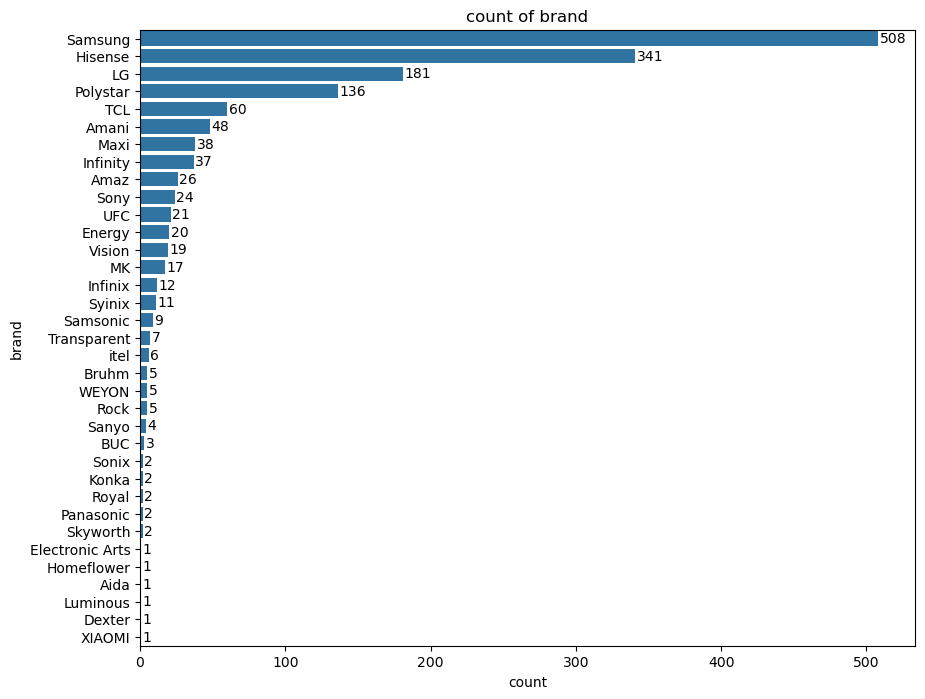

In [76]:
# plot the barchat of count of brand in the dataset 
count = smart_tv_dataset['brand'].value_counts()
hqualitative_plotter(smart_tv_dataset, 'brand', count )

In [77]:
smart_tv_dataset['brand'].value_counts()[0]

508

In [78]:
# Top 5 brand by market share 
top_5_brand = sum(smart_tv_dataset.brand.value_counts()[0:5])
total = sum(smart_tv_dataset.brand.value_counts())
share = top_5_brand/total *100
share

78.64015394483643

### Price distribution

In [79]:
smart_tv_dataset['price'].describe()

count    1.559000e+03
mean     5.253904e+05
std      5.266583e+05
min      3.850000e+04
25%      1.959250e+05
50%      3.600000e+05
75%      5.850000e+05
max      4.500000e+06
Name: price, dtype: float64

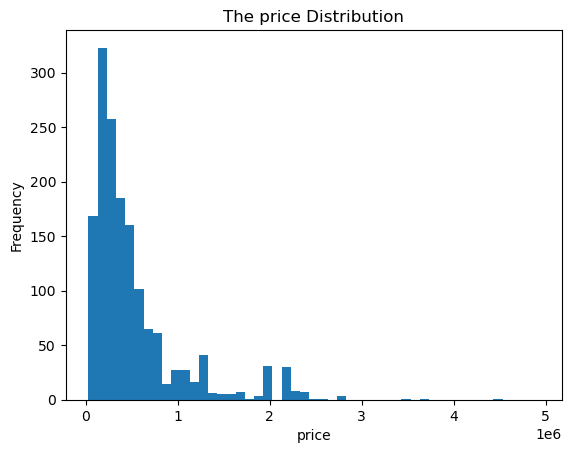

In [80]:
bin = np.arange(30000, 5e6,100000)
hist = Quantitave_plotter(smart_tv_dataset, 'price', bin, xscale = 'linear')

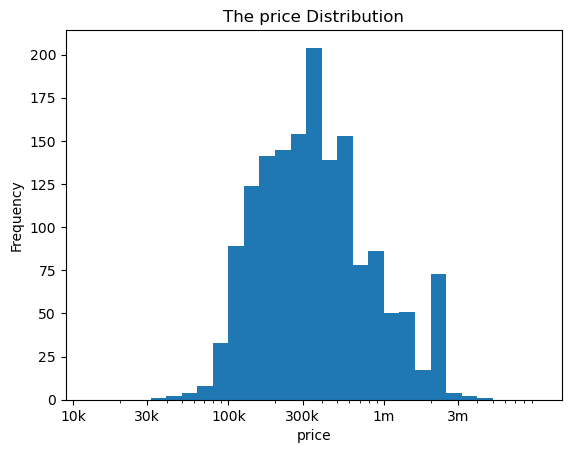

In [81]:
#plot the price distribution

label = ['10k', '30k', '100k', '300k', '1m', '3m']
xticks_value = [1e4, 3e4, 1e5, 3e5, 1e6, 3e6]
bin = 10**np.arange(4.1, 6+1, 0.1)
hist = Quantitave_plotter(smart_tv_dataset, 'price', bin, xscale = 'log')
plt.xticks(xticks_value, label);

#### Observation

- The price distribution shows a positively skewed distribution with modal price value around 300,000 naira.
- On the logarithmic scale we can see how the 300k price rises sharply above the other classes as well as the sharp rise at 2 million.

#### Sellers
Here I want to find out the sellers who are most invested in the jumia smart_tv category.

In [82]:
smart_tv_dataset.seller_name

0        WEYON Official Store-Sea-COD
1                          cydone gas
2                        Clem Fortune
3                   F & G Electronics
4                               Kendo
                    ...              
1554                            Kendo
1555             B AND Q COLLECTIBLES
1556       Office Comfort Enterprises
1557    Samsung and Sony online store
1558                Accessories_Arena
Name: seller_name, Length: 1559, dtype: object

In [83]:
top_50_sellers = smart_tv_dataset['seller_name'].value_counts().reset_index().head(50)
top_50_sellers.sort_values (by ='seller_name', ascending = True, inplace = True )

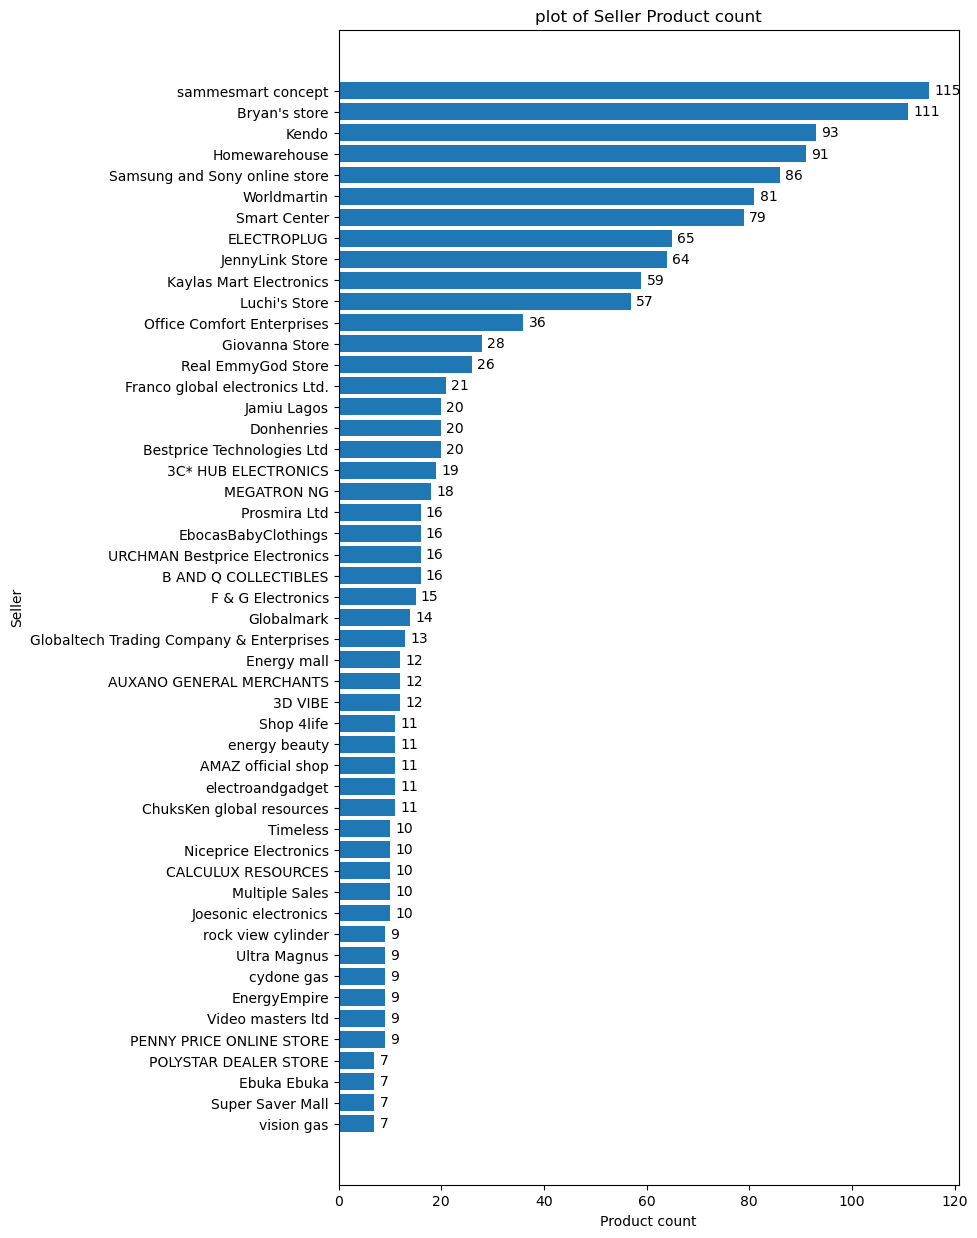

In [84]:
plt.figure(figsize = (8,15))
plt.barh(top_50_sellers['index'], width = top_50_sellers['seller_name'])
plt.xlabel('Product count')
plt.ylabel('Seller')
plt.title('plot of Seller Product count');

for v in range(top_50_sellers.shape[0]):
    
    count = top_50_sellers['seller_name'][v]
    text = '{}'.format(count)     
    plt.text(count+1, 50-v-1, text, va = 'center')
  

#### Observation

The top 5 sellers with the highest number of listed product on the jumia smart_tv category are:

1. sammesmart concept (115)
2. Bryan's store (111)
3. Kendo (93)
4. Homewarehouse (91)
5. Samsung and Sony online store (86)

There are 106 sellers with items listed on the smart_tv category.
The rest have 4 items or less listed.

In [85]:
smart_tv_dataset

,price,name,brand,seller_name,seller_rating,url,rating,screen_size,resolution,panel_type,android
0,79990,"weyon 32"" inches hd smart tv",WEYON,WEYON Official Store-Sea-COD,60,https://www.jumia.com.ng/weyon-32-inches-hd-sm...,4.7,32,hd,None,no
1,128490,amani 43”inch 4k uhd smart android wi-fi tv,Amani,cydone gas,74,https://www.jumia.com.ng/amani-43inch-4k-uhd-s...,5.0,43,uhd,None,yes
2,169900,tcl 43-inch android smart fhd tv,TCL,Clem Fortune,100,https://www.jumia.com.ng/tcl-43-inch-android-s...,4.3,43,fhd,None,yes
3,265000,hisense 55''smart uhd 4k tv,Hisense,F & G Electronics,86,https://www.jumia.com.ng/hisense-55smart-uhd-4...,4.9,55,uhd,None,no
4,222000,hisense 55''smart uhd 4k framless tv,Hisense,Kendo,80,https://www.jumia.com.ng/hisense-55smart-uhd-4...,0.0,55,uhd,None,no
...,...,...,...,...,...,...,...,...,...,...,...
1554,118000,polystar 32-inches smart curved tv,Polystar,Kendo,80,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led,no
1555,183999,"infinity 50"" inches smart tv",Infinity,B AND Q COLLECTIBLES,74,https://www.jumia.com.ng/infinity-50-inches-sm...,0.0,50,None,None,no
1556,116695,polystar 32-inches smart curved tv,Polystar,Office Comfort Enterprises,60,https://www.jumia.com.ng/polystar-32-inches-sm...,0.0,32,None,led,no
1557,144300,hisense 40” smart frameless tv,Hisense,Samsung and Sony online store,66,https://www.jumia.com.ng/hisense-40-smart-fram...,4.8,40,None,None,no


#### Seller Rating

In [86]:
smart_tv_dataset['seller_rating'].describe()

count    1559.000000
mean       65.377806
std        31.741580
min         0.000000
25%        50.000000
50%        66.000000
75%        94.000000
max       100.000000
Name: seller_rating, dtype: float64

(array([205.,   0.,   3.,  71.,   1., 131., 429.,  64., 205., 450.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <BarContainer object of 10 artists>)

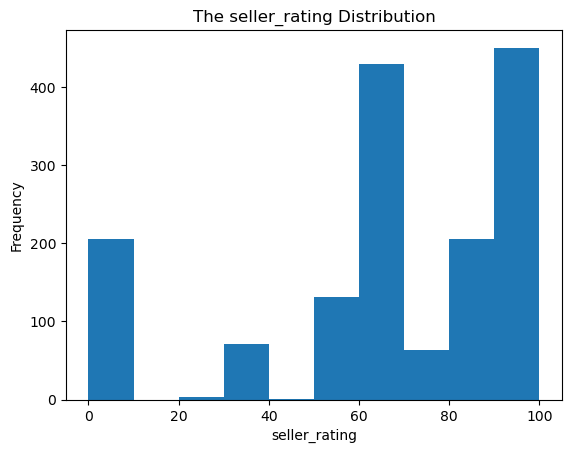

In [87]:
bin = np.arange(0,100+10, 10)
Quantitave_plotter(smart_tv_dataset, 'seller_rating', bin, xscale = 'linear')

#### Observation

The distribution of the seller rating is negatively skewed with the mdal class being the max value in the dataset i.e 100
The negative skewness imply that there are more sellers with a rating above the median rating value.

#### Product Rating

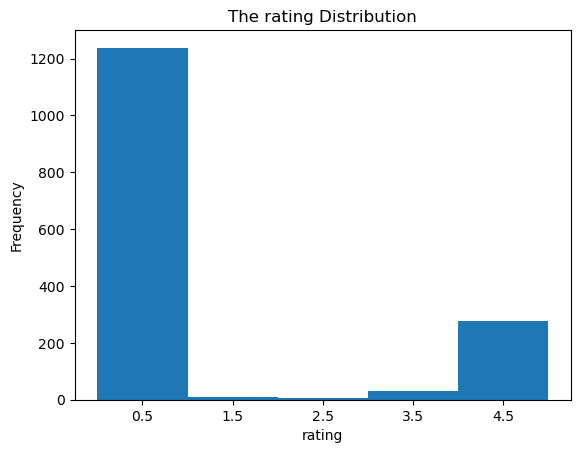

In [88]:
xticks_value = [0.5,1.5,2.5,3.5,4.5]
bin = np.arange(0, 5+1, 1)
Quantitave_plotter(smart_tv_dataset, 'rating', bin, xscale = 'linear')
plt.xticks(xticks_value, xticks_value);

#### Observation 
 - The Product rating shows that the distribution has a modal class at 0.5. However, upon further scrutiny, itwas observed that majority of the ratings in that class were zero, which corresponds to those products in the listing that has not been rated.
 - It can be observed that over 1200(77%) of the smart_tv listed were not rated
 - on the other hand, only about 300(19%) of the smart_tv listed has a rating between 4 and 5
 - This shows the pareto distribution and is very much expected as far as customer satisfaction is concerned.
 - Customer satisfaction is related to the quality of the product or the quality of the services rendered by the seller of the product. 

In [89]:
smart_tv_rating_= smart_tv_dataset[smart_tv_dataset['rating']>0]

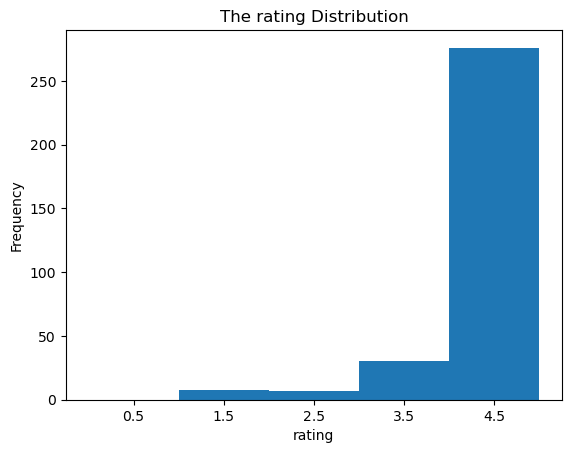

In [90]:
xticks_value = [0.5,1.5,2.5,3.5,4.5]
bin = np.arange(0, 5+1, 1)
Quantitave_plotter(smart_tv_rating_, 'rating', bin, xscale = 'linear')
plt.xticks(xticks_value, xticks_value);

#### observation:
it can be observed that amongst those rated products, majority of the customers are generally satisfied with their purchase.

#### Screen Size

Plot the screen size

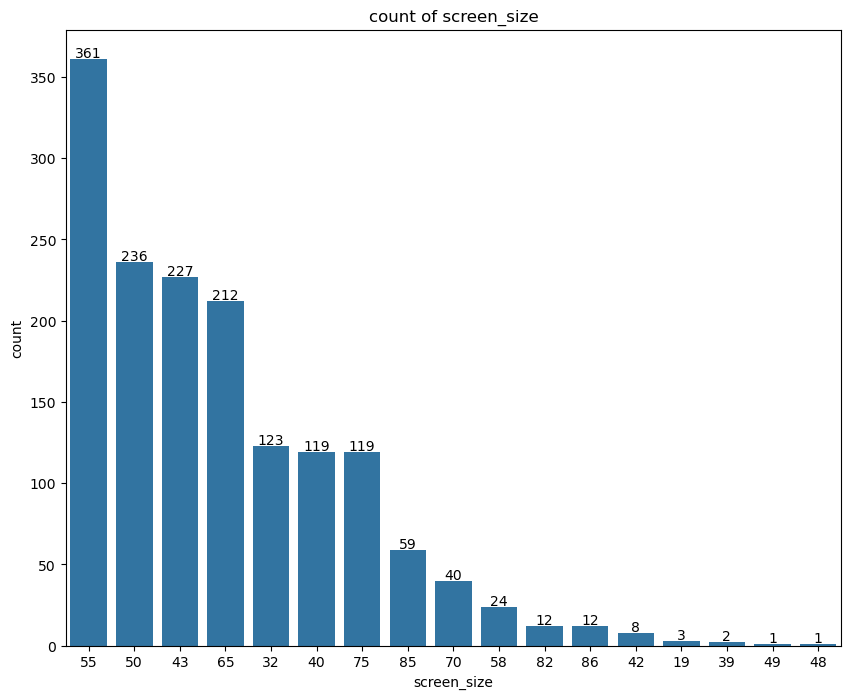

In [91]:
value_count = smart_tv_dataset.screen_size.value_counts()
vqualitative_plotter(smart_tv_dataset,'screen_size', value_count )

#### Observation
- the most common Tv screen size is the 55 inch TV at 361 TV listing and 23% of the entire TV listed

#### observation
Some values  e.g 10,19,20 looks unrealistic and should be probed further

#### Resolution
Plot the resolution column

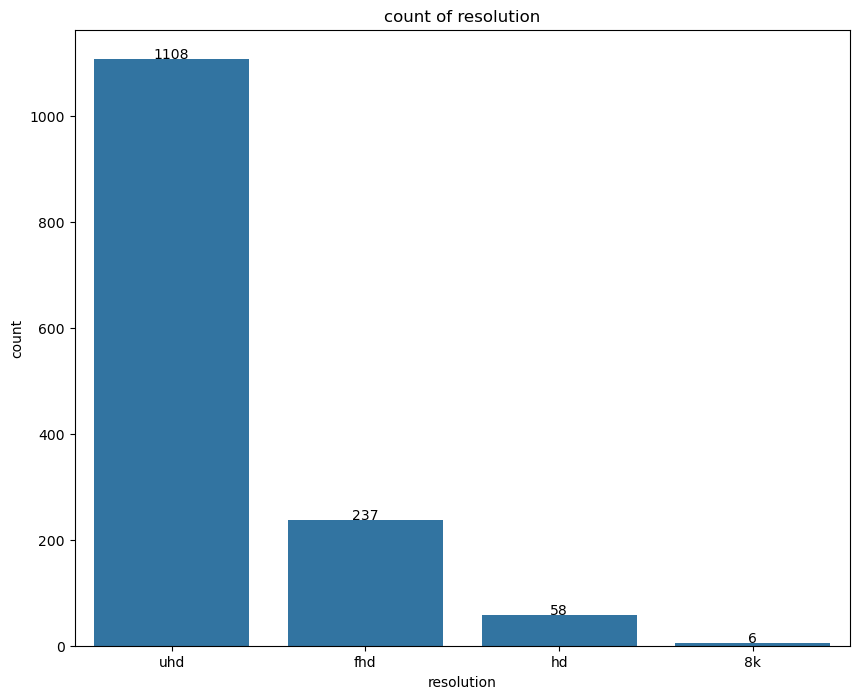

In [92]:
value_count = smart_tv_dataset.resolution.value_counts()
vqualitative_plotter(smart_tv_dataset,'resolution', value_count )

In [93]:
smart_tv_dataset.resolution.value_counts(normalize = True)

uhd    0.786373
fhd    0.168204
hd     0.041164
8k     0.004258
Name: resolution, dtype: float64

#### Observation
UHD Tvs are the most common TV listed by the screen resolution classification. There are 1108 UHd tv listed amounting to 78% of the entire TV listed

####  panel_type

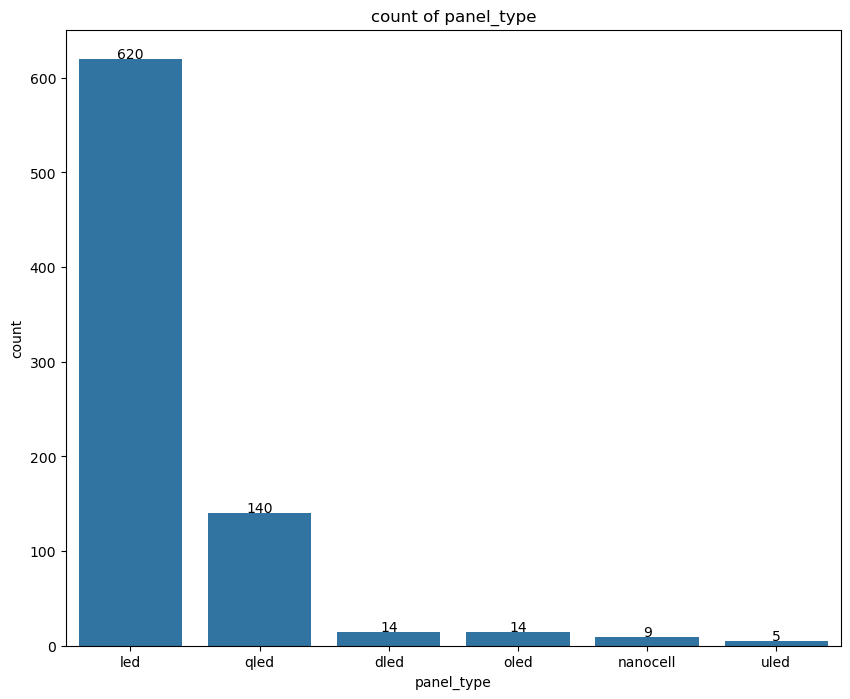

In [94]:
value_count = smart_tv_dataset.panel_type.value_counts()
vqualitative_plotter(smart_tv_dataset,'panel_type', value_count )

In [95]:
smart_tv_dataset.panel_type.value_counts(normalize = True)

led         0.773067
qled        0.174564
dled        0.017456
oled        0.017456
nanocell    0.011222
uled        0.006234
Name: panel_type, dtype: float64

#### Observation
LED Tv are the most listed category of panel types with 620 led TV Listed. This means that 77% of the TV lsited are LED TV.

#### Android TV?
    Here, the aim is to find out if the TV is supported by the Android os or not.
    In carrying out this classification, I have assumed that if it was categorically 
    stated that the TV has an android OS, then that is a 'yes'. 
    If not stated, then its a 'no'
    While it is possible that a TV is suported by android OS but is not stated, however, I consider this very unlikely.

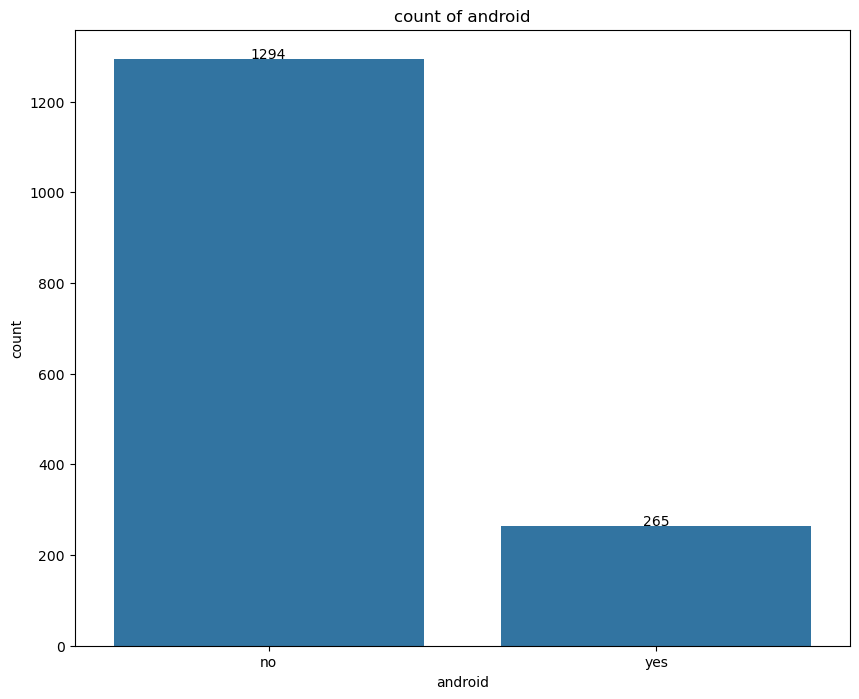

In [96]:
value_count = smart_tv_dataset.android.value_counts()
vqualitative_plotter(smart_tv_dataset,'android', value_count )

In [97]:
smart_tv_dataset.android.value_counts(normalize = True)

no     0.830019
yes    0.169981
Name: android, dtype: float64

#### Observation
1294 smart_tvs are not supported by android OS and only 265 are supported by android OS.
i.e only 17% of the listed smart TVs have android OS

## Bivariate Analysis


#### The Numerical variables.
Inorder to observe the patterns more clearly i will be dealing with some outliers in the dataset.
- I will remove brands with count not greater than 5
- Remove all Zero ratings
- Remove prices greater than 1m


In [98]:
smart_tv_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          1559 non-null   int32   
 1   name           1559 non-null   object  
 2   brand          1559 non-null   object  
 3   seller_name    1559 non-null   object  
 4   seller_rating  1559 non-null   int32   
 5   url            1559 non-null   object  
 6   rating         1559 non-null   float64 
 7   screen_size    1559 non-null   category
 8   resolution     1409 non-null   object  
 9   panel_type     802 non-null    object  
 10  android        1559 non-null   object  
dtypes: category(1), float64(1), int32(2), object(7)
memory usage: 111.9+ KB


In [99]:
# Removing brands with listing less than 5

brand_count = smart_tv_dataset.brand.value_counts()
brand_count_greater_than_5 = smart_tv_dataset[smart_tv_dataset.brand.isin(brand_count[brand_count>5].index)]

# removing zero ratings
brand_rating_sample = brand_count_greater_than_5[brand_count_greater_than_5['rating']!=0]

# removing price less greater than 1e6
brand_rating_sample = brand_rating_sample[brand_rating_sample['price']<1e6]

<AxesSubplot:>

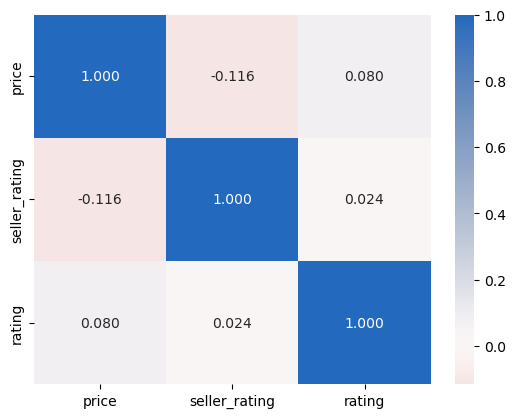

In [100]:
numeric = ['price', 'seller_rating', 'rating']
sb.heatmap(brand_rating_sample[numeric].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)

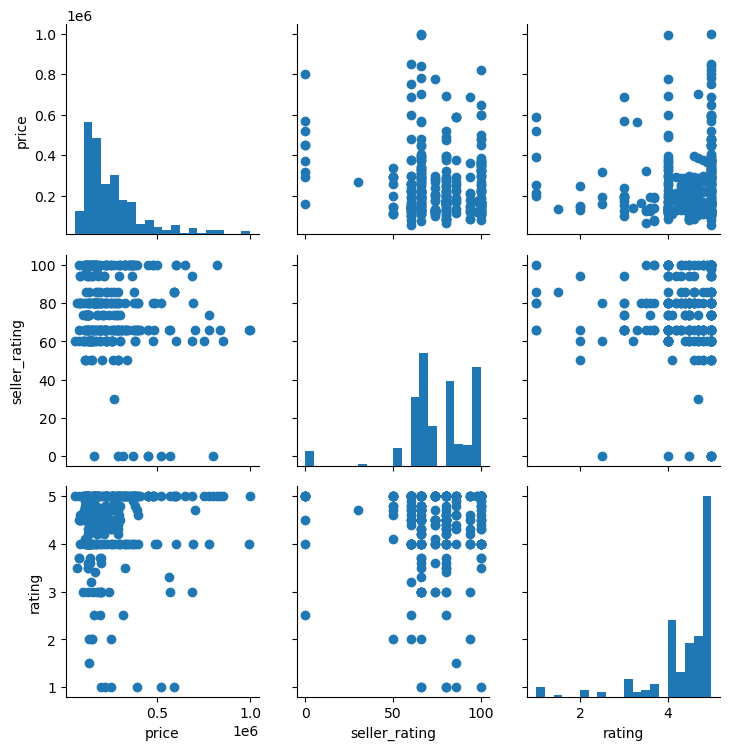

In [101]:
g = sb.PairGrid(data = brand_rating_sample, vars = numeric)
g = g.map_diag(plt.hist, bins = 20)
g.map_offdiag(plt.scatter)

#### Observation
There is no correlation the numerical variable.  The price and rating shows no correlation and also the seller rating does not seem to affect the prices.

#### Lets consider the categorical variables against the numerical variables.

#### Brand vs Price
In exploring the patterns from the brand and price column
- I will remove brands with listing less than 5

In [102]:
def qual_quantplot(data, qual, quant, plottype = sb.boxplot):
    '''
    Plot a 2 qualitative column vs a quantitative column
    '''
    
    plt.figure(figsize = (8,7))
    ax = plt.subplot(1,1,1)
    qual_quant_index = data.groupby(qual)[quant].median().sort_values(ascending = False).index
    default_color = sb.color_palette()[0]
    plottype(data = data, y= qual, x = quant, order = qual_quant_index, color = default_color, ax = ax)
    plt.title('{} vs {}'.format(qual,quant))
    return (ax)

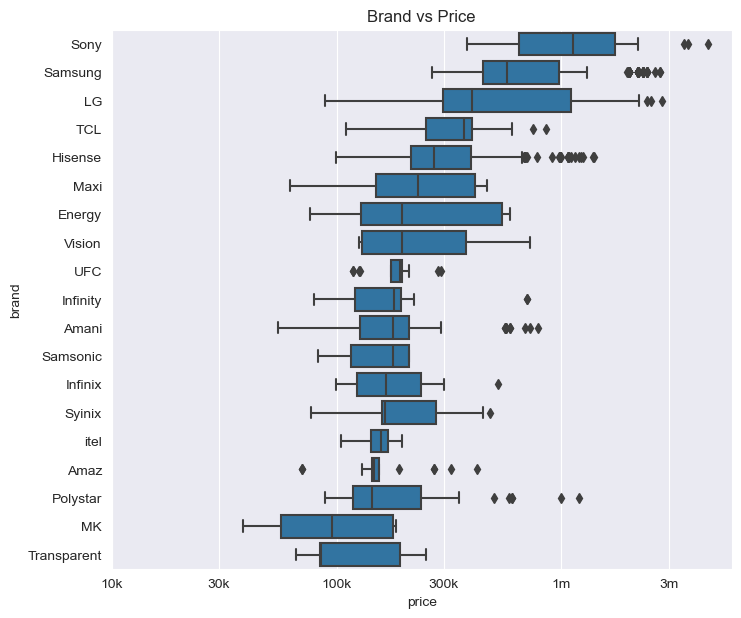

In [103]:
sb.set_style('darkgrid')
ax1 =qual_quantplot(brand_count_greater_than_5, 'brand','price')
ax1.set_xscale('log')
label = ['10k', '30k', '100k', '300k', '1m', '3m']
xticks_value = [1e4, 3e4, 1e5, 3e5, 1e6, 3e6]
ax1.set_xticks(xticks_value, label);
plt.title('Brand vs Price');

In [104]:
brand_count_greater_than_5.groupby('brand')['price'].median().sort_values(ascending =False)[:2]

brand
Sony       1120000.0
Samsung     570000.0
Name: price, dtype: float64

#### Observation
- Sony products has the highest median price at 1 million(1,120,000) and has most of the product on the listing above the overall median price of 300k
- Samsung products has the second highest median price at 500k (570,000) which is about half of the sony median price value.

#### Brand vs Rating

<AxesSubplot:title={'center':'brand vs rating'}, xlabel='rating', ylabel='brand'>

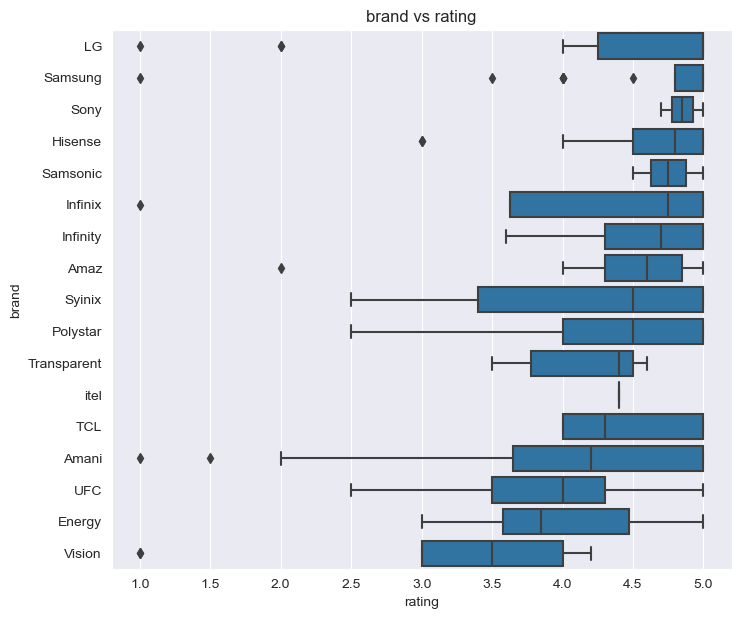

In [105]:
# extracting only brand_count greater than 5 
rating_greater_than_zero = brand_count_greater_than_5[brand_count_greater_than_5['rating']!=0]


qual_quantplot(rating_greater_than_zero, 'brand', 'rating')

#### Observation
While LG and Samsung products have the highest median values, LG products have 

In [106]:
smart_tv_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          1559 non-null   int32   
 1   name           1559 non-null   object  
 2   brand          1559 non-null   object  
 3   seller_name    1559 non-null   object  
 4   seller_rating  1559 non-null   int32   
 5   url            1559 non-null   object  
 6   rating         1559 non-null   float64 
 7   screen_size    1559 non-null   category
 8   resolution     1409 non-null   object  
 9   panel_type     802 non-null    object  
 10  android        1559 non-null   object  
dtypes: category(1), float64(1), int32(2), object(7)
memory usage: 111.9+ KB


#### screen_size vs price

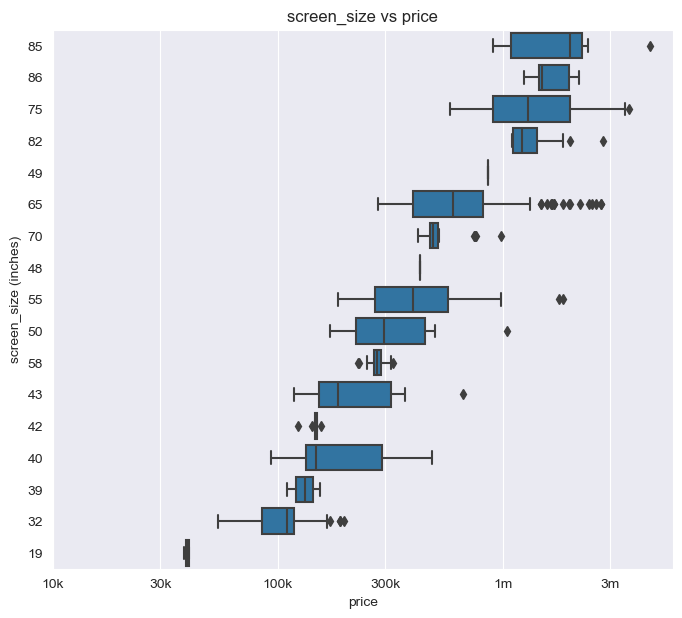

In [107]:
ax2 =qual_quantplot(smart_tv_dataset, 'screen_size', 'price')
ax2.set_ylabel('screen_size (inches)')
ax2.set_xscale('log')
label = ['10k', '30k', '100k', '300k', '1m', '3m']
xticks_value = [1e4, 3e4, 1e5, 3e5, 1e6, 3e6]
ax2.set_xticks(xticks_value, label);


####  Observation 
It is quite expected  that the screen size is a strong determinant of the price.


#### Resolution vs Price

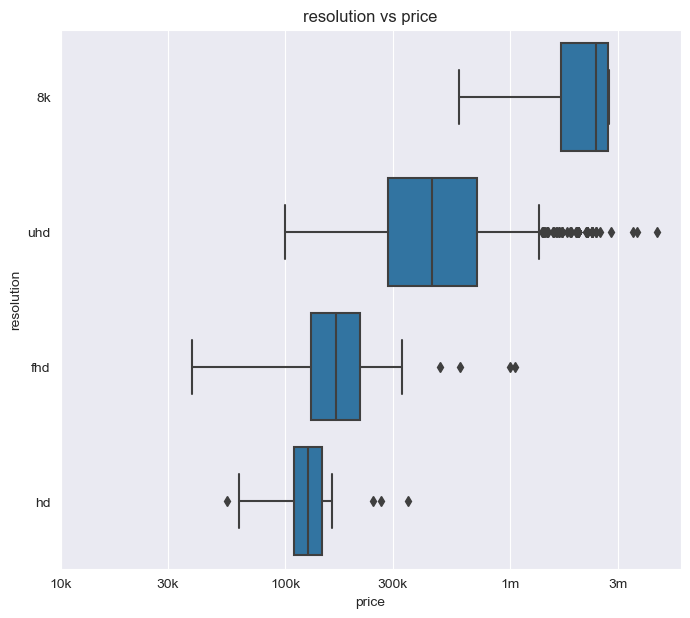

In [108]:
ax = qual_quantplot(smart_tv_dataset, 'resolution', 'price')
ax.set_xscale('log')
label = ['10k', '30k', '100k', '300k', '1m', '3m']
xticks_value = [1e4, 3e4, 1e5, 3e5, 1e6, 3e6]
ax.set_xticks(xticks_value, label);

#### Observation  

#### panel-type

<AxesSubplot:title={'center':'panel_type vs price'}, xlabel='price', ylabel='panel_type'>

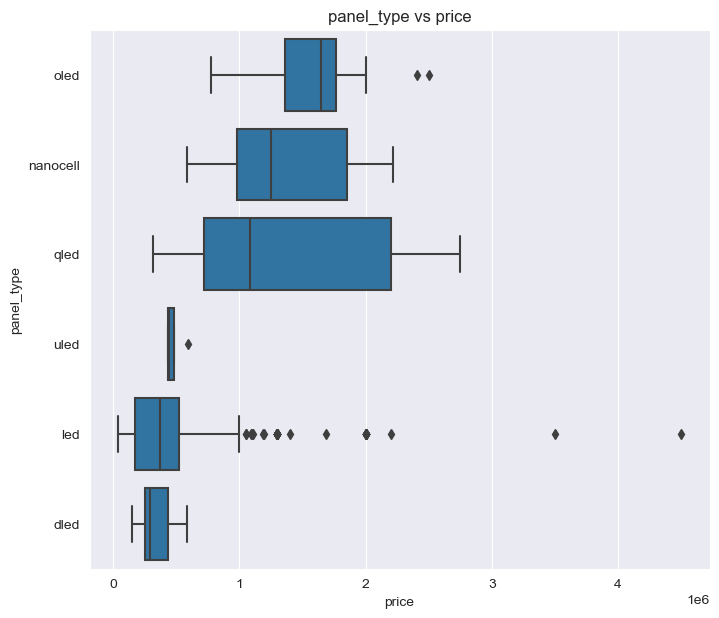

In [109]:
qual_quantplot(smart_tv_dataset, 'panel_type', 'price')

<AxesSubplot:title={'center':'android vs price'}, xlabel='price', ylabel='android'>

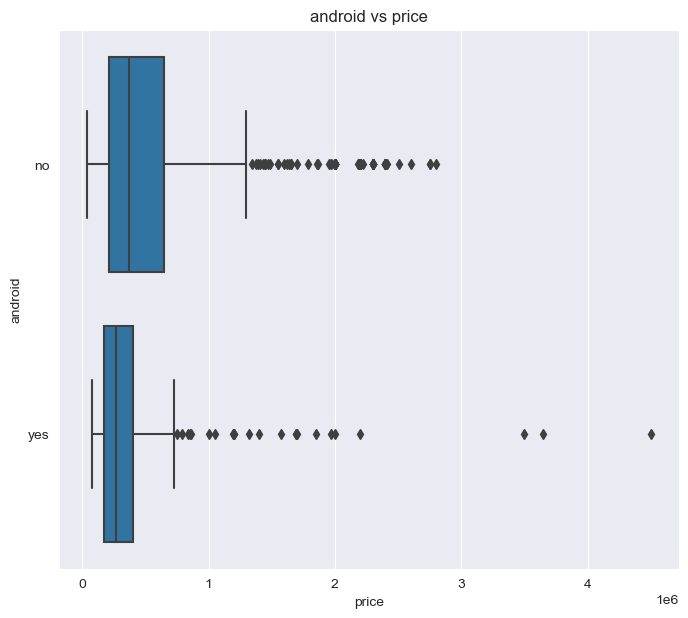

In [110]:
qual_quantplot(smart_tv_dataset, 'android', 'price')

In [111]:
rating_greater_than_zero =smart_tv_dataset[smart_tv_dataset.rating>0]

<AxesSubplot:title={'center':'android vs rating'}, xlabel='rating', ylabel='android'>

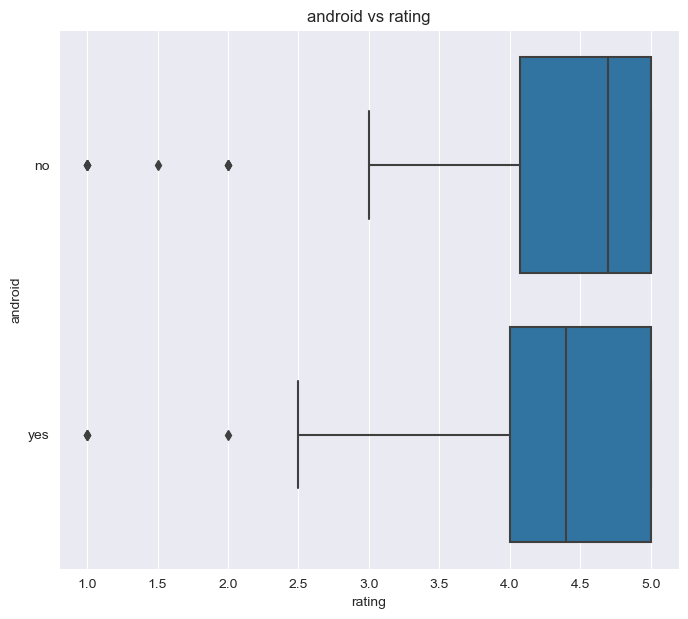

In [112]:
qual_quantplot(rating_greater_than_zero, 'android', 'rating')

<AxesSubplot:title={'center':'panel_type vs rating'}, xlabel='rating', ylabel='panel_type'>

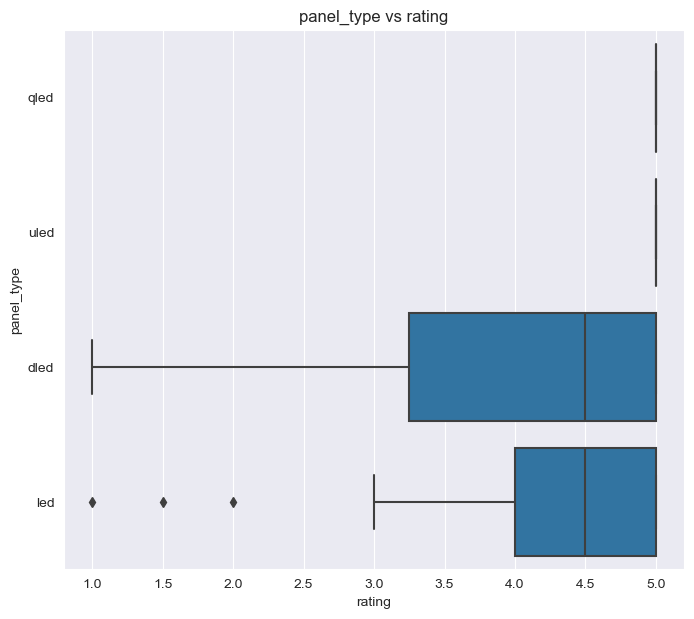

In [113]:
qual_quantplot(rating_greater_than_zero, 'panel_type', 'rating')

<AxesSubplot:title={'center':'resolution vs rating'}, xlabel='rating', ylabel='resolution'>

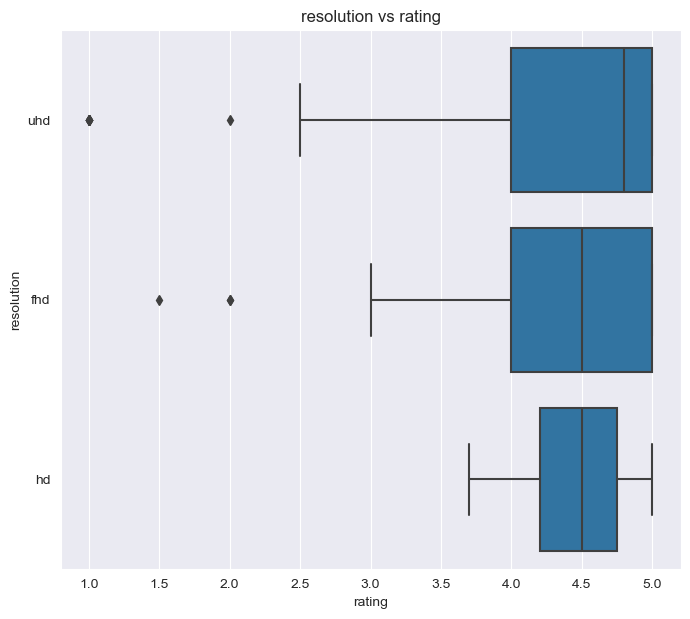

In [114]:
qual_quantplot(rating_greater_than_zero, 'resolution', 'rating')

<AxesSubplot:title={'center':'screen_size vs rating'}, xlabel='rating', ylabel='screen_size'>

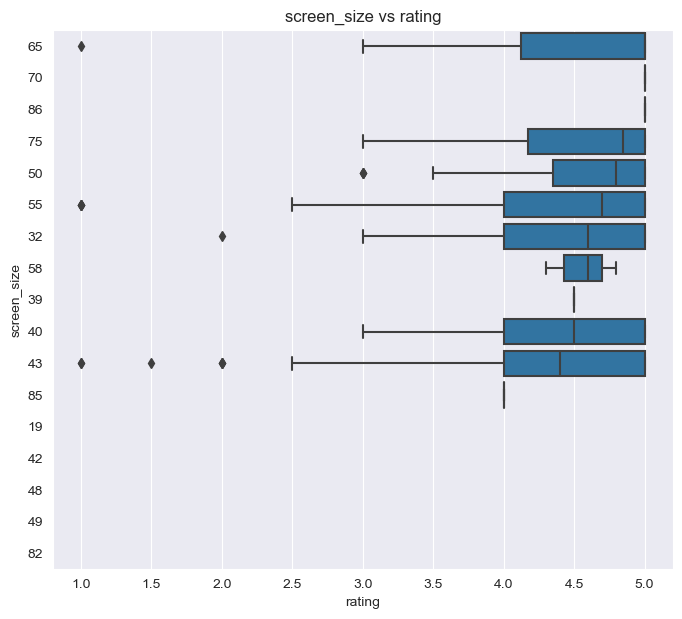

In [115]:
qual_quantplot(rating_greater_than_zero, 'screen_size', 'rating')